## Traffic sign Classification Task using Convolutional Neural Networks

### Problem Statement:

- The project is to classify images of traffic signs using deep Convolutional Neural Networks.
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

### Importing all the necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

E:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
with open("./traffic_signs_data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic_signs_data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic_signs_data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_valid,y_valid = valid['features'], valid['labels']
X_test,y_test = test['features'], test['labels']

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [4]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(34799,)
(4410,)
(12630,)


### Checking out random images from the dataset

6

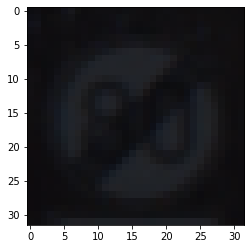

In [5]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

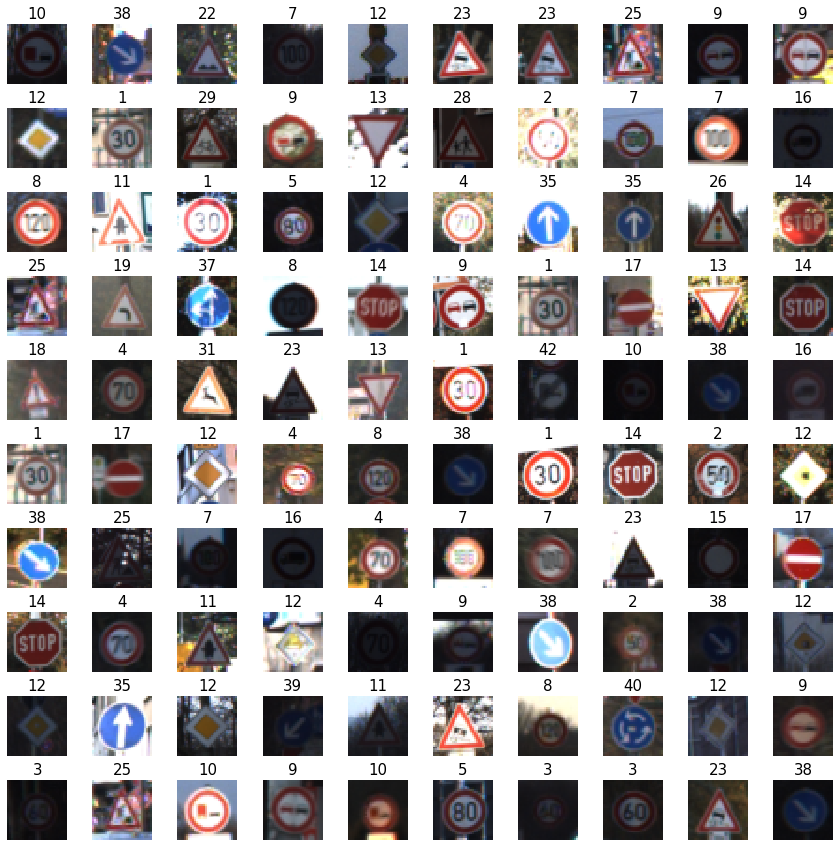

In [6]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 

    # Select a random number
    
    # read and display an image with the selected index    
for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)
        

### Converting images to grayscale and performing normalization

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [8]:
X_train_gray = np.sum(X_train/3 , axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3 , axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3 , axis = 3, keepdims = True)

In [9]:
print(X_train_gray.shape)
print(X_valid_gray.shape)
print(X_test_gray.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [10]:
X_train_gray_norm = (X_train_gray - 128 ) /128
X_valid_gray_norm = (X_valid_gray - 128 ) /128
X_test_gray_norm = (X_test_gray - 128 ) /128

In [13]:
X_train_gray_norm[0]

array([[[-0.85416667],
        [-0.84635417],
        [-0.85416667],
        ...,
        [-0.84895833],
        [-0.8515625 ],
        [-0.86197917]],

       [[-0.86458333],
        [-0.85416667],
        [-0.859375  ],
        ...,
        [-0.85677083],
        [-0.8515625 ],
        [-0.85677083]],

       [[-0.859375  ],
        [-0.8671875 ],
        [-0.875     ],
        ...,
        [-0.85677083],
        [-0.8515625 ],
        [-0.8515625 ]],

       ...,

       [[-0.89583333],
        [-0.88541667],
        [-0.88020833],
        ...,
        [-0.875     ],
        [-0.875     ],
        [-0.87760417]],

       [[-0.88802083],
        [-0.87760417],
        [-0.87239583],
        ...,
        [-0.8828125 ],
        [-0.87760417],
        [-0.88802083]],

       [[-0.84375   ],
        [-0.83072917],
        [-0.83072917],
        ...,
        [-0.8828125 ],
        [-0.8828125 ],
        [-0.8828125 ]]])

#### Gray Scale image, Color Image and normalized image is displayed below. Normalized images must be fed to the network.

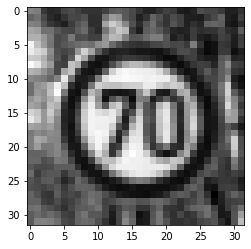

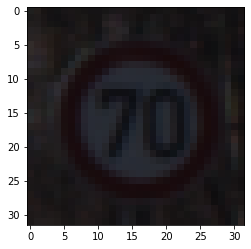

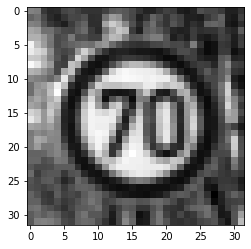

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

### Building CNN network

In [16]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(8,(10,10), activation = 'relu', input_shape = (32,32,1), padding = "same"))
model.add(layers.AveragePooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(16,(10,10),activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(43, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         808       
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          12816     
_________________________________________________________________
average_pooling2d_3 (Average (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)              

In [17]:

model2 = models.Sequential()
model2.add(layers.Conv2D(8,(5,5), activation = 'relu', input_shape = (32,32,1), padding = "same"))
model2.add(layers.AveragePooling2D())
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(16,(5,5),activation='relu'))
model2.add(layers.AveragePooling2D())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(32,(5,5),activation='relu'))
model2.add(layers.AveragePooling2D())
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation = 'relu'))
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(43, activation = 'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         208       
_________________________________________________________________
average_pooling2d_4 (Average (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 16)        3216      
_________________________________________________________________
average_pooling2d_5 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 32)         

### Compiling and Training the model

In [20]:
model.compile(optimizer = 'Adam',loss='sparse_categorical_crossentropy', metrics = ['acc'])

history1 = model.fit(X_train_gray_norm, y_train,
                    batch_size =50, 
                    epochs = 25, verbose = 1, 
                    validation_data = (X_valid_gray_norm,y_valid))

Epoch 1/25
696/696 [==============================] - 20s 29ms/step - loss: 1.3422 - acc: 0.5922 - val_loss: 0.8265 - val_acc: 0.7379
Epoch 2/25
696/696 [==============================] - 24s 35ms/step - loss: 0.7968 - acc: 0.7537 - val_loss: 0.5931 - val_acc: 0.8197
Epoch 3/25
696/696 [==============================] - 25s 35ms/step - loss: 0.6134 - acc: 0.8126 - val_loss: 0.4772 - val_acc: 0.8583
Epoch 4/25
696/696 [==============================] - 24s 35ms/step - loss: 0.5181 - acc: 0.8385 - val_loss: 0.3937 - val_acc: 0.8771
Epoch 5/25
696/696 [==============================] - 24s 35ms/step - loss: 0.4429 - acc: 0.8614 - val_loss: 0.3312 - val_acc: 0.8998
Epoch 6/25
696/696 [==============================] - 24s 34ms/step - loss: 0.4040 - acc: 0.8739 - val_loss: 0.3550 - val_acc: 0.9002
Epoch 7/25
696/696 [==============================] - 27s 39ms/step - loss: 0.3622 - acc: 0.8853 - val_loss: 0.3362 - val_acc: 0.9109
Epoch 8/25
696/696 [==============================] - 25s 36ms

In [21]:
opt = tf.keras.optimizers.Adam(lr=0.0025)
model2.compile(optimizer = opt,loss='sparse_categorical_crossentropy', metrics = ['acc'])

history3 = model2.fit(X_train_gray_norm, y_train,
                    batch_size = 75, 
                    epochs = 50, verbose = 1, 
                    validation_data = (X_valid_gray_norm,y_valid))

Epoch 1/50
464/464 [==============================] - 10s 22ms/step - loss: 2.7554 - acc: 0.2154 - val_loss: 1.6638 - val_acc: 0.5032
Epoch 2/50
464/464 [==============================] - 10s 22ms/step - loss: 1.5053 - acc: 0.5229 - val_loss: 0.8625 - val_acc: 0.7342
Epoch 3/50
464/464 [==============================] - 11s 25ms/step - loss: 1.0868 - acc: 0.6561 - val_loss: 0.6991 - val_acc: 0.7755
Epoch 4/50
464/464 [==============================] - 12s 25ms/step - loss: 0.9100 - acc: 0.7070 - val_loss: 0.5230 - val_acc: 0.8263
Epoch 5/50
464/464 [==============================] - 12s 25ms/step - loss: 0.7954 - acc: 0.7455 - val_loss: 0.4510 - val_acc: 0.8569
Epoch 6/50
464/464 [==============================] - 12s 25ms/step - loss: 0.7335 - acc: 0.7640 - val_loss: 0.4020 - val_acc: 0.8664
Epoch 7/50
464/464 [==============================] - 12s 25ms/step - loss: 0.6790 - acc: 0.7821 - val_loss: 0.3850 - val_acc: 0.8839
Epoch 8/50
464/464 [==============================] - 12s 26ms

In [22]:
model2.compile(optimizer = 'Adam',loss='sparse_categorical_crossentropy', metrics = ['acc'])

history2 = model2.fit(X_train_gray_norm, y_train,
                    batch_size = 25, 
                    epochs = 50, verbose = 1, 
                    validation_data = (X_valid_gray_norm,y_valid))

Epoch 1/50
1392/1392 [==============================] - 14s 10ms/step - loss: 0.3434 - acc: 0.8934 - val_loss: 0.1972 - val_acc: 0.9413
Epoch 2/50
1392/1392 [==============================] - 15s 11ms/step - loss: 0.3370 - acc: 0.8943 - val_loss: 0.1976 - val_acc: 0.9324
Epoch 3/50
1392/1392 [==============================] - 16s 11ms/step - loss: 0.3338 - acc: 0.8965 - val_loss: 0.1929 - val_acc: 0.9374
Epoch 4/50
1392/1392 [==============================] - 16s 11ms/step - loss: 0.3315 - acc: 0.8963 - val_loss: 0.2184 - val_acc: 0.9297
Epoch 5/50
1392/1392 [==============================] - 16s 11ms/step - loss: 0.3288 - acc: 0.8972 - val_loss: 0.1876 - val_acc: 0.9422
Epoch 6/50
1392/1392 [==============================] - 15s 11ms/step - loss: 0.3263 - acc: 0.8972 - val_loss: 0.2249 - val_acc: 0.9302
Epoch 7/50
1392/1392 [==============================] - 15s 10ms/step - loss: 0.3255 - acc: 0.8994 - val_loss: 0.1941 - val_acc: 0.9401
Epoch 8/50
1392/1392 [==========================

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import datetime
import os

opt = tf.keras.optimizers.Adam(lr= 1e-3)
model2.compile(optimizer = opt,loss='sparse_categorical_crossentropy', metrics = ['acc'])

curr_dt_time = datetime.datetime.now()

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
name = 'model'
filepath = model_name + 'model-'+name+'.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, cooldown=1, verbose=1) # write the REducelronplateau code here

callback = [tf.keras.callbacks.EarlyStopping(patience=10),
            [checkpoint,LR],
            tf.keras.callbacks.TensorBoard(log_dir='./logs')]

history3 = model2.fit(X_train_gray_norm, y_train,
                    batch_size = 100, callbacks=callback,
                    epochs = 50, verbose = 1, 
                    validation_data = (X_valid_gray_norm,y_valid))

Epoch 1/50
348/348 [==============================] - ETA: 0s - loss: 0.2421 - acc: 0.9253
Epoch 00001: val_loss improved from inf to 0.16710, saving model to model_init_2021-01-0207_33_03.825855\model-model.h5
348/348 [==============================] - 12s 34ms/step - loss: 0.2421 - acc: 0.9253 - val_loss: 0.1671 - val_acc: 0.9483
Epoch 2/50
347/348 [============================>.] - ETA: 0s - loss: 0.2427 - acc: 0.9250
Epoch 00002: val_loss improved from 0.16710 to 0.16122, saving model to model_init_2021-01-0207_33_03.825855\model-model.h5
348/348 [==============================] - 11s 32ms/step - loss: 0.2432 - acc: 0.9250 - val_loss: 0.1612 - val_acc: 0.9535
Epoch 3/50
347/348 [============================>.] - ETA: 0s - loss: 0.2364 - acc: 0.9266
Epoch 00003: val_loss improved from 0.16122 to 0.15608, saving model to model_init_2021-01-0207_33_03.825855\model-model.h5
348/348 [==============================] - 11s 32ms/step - loss: 0.2359 - acc: 0.9267 - val_loss: 0.1561 - val_ac

Epoch 28/50
347/348 [============================>.] - ETA: 0s - loss: 0.2224 - acc: 0.9302
Epoch 00028: val_loss did not improve from 0.14294
348/348 [==============================] - 12s 33ms/step - loss: 0.2226 - acc: 0.9301 - val_loss: 0.1440 - val_acc: 0.9562
Epoch 29/50
347/348 [============================>.] - ETA: 0s - loss: 0.2233 - acc: 0.9301
Epoch 00029: val_loss did not improve from 0.14294
348/348 [==============================] - 11s 32ms/step - loss: 0.2233 - acc: 0.9301 - val_loss: 0.1701 - val_acc: 0.9438
Epoch 30/50
347/348 [============================>.] - ETA: 0s - loss: 0.2242 - acc: 0.9307- ETA: 0s - loss: 0.2268 
Epoch 00030: val_loss did not improve from 0.14294
348/348 [==============================] - 11s 32ms/step - loss: 0.2241 - acc: 0.9307 - val_loss: 0.1589 - val_acc: 0.9517
Epoch 31/50
347/348 [============================>.] - ETA: 0s - loss: 0.2180 - acc: 0.9310
Epoch 00031: val_loss did not improve from 0.14294

Epoch 00031: ReduceLROnPlateau re

### Evaluating Model Performance 

In [44]:
print('score')
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

score
395/395 [==============================] - 2s 6ms/step - loss: 0.4183 - acc: 0.9159
Test Accuracy: 0.9159144759178162


In [45]:
score = model2.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 4ms/step - loss: 0.2543 - acc: 0.9320
Test Accuracy: 0.9319873452186584


In [47]:
history3.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [48]:
accuracy = history3.history['acc']
val_accuracy = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

Text(0.5, 1.0, 'Training vs Validation loss')

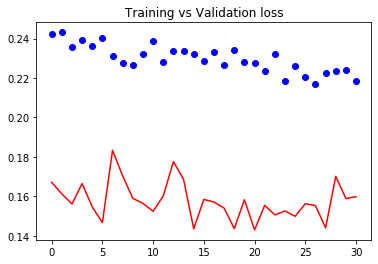

In [49]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss,'r', label = 'Validation_loss')
plt.title('Training vs Validation loss')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

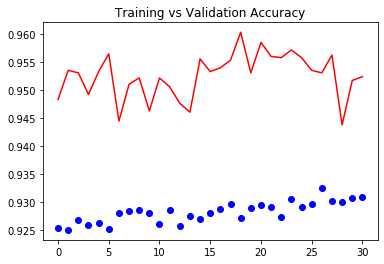

In [50]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Loss')
plt.plot(epochs, val_accuracy,'r', label = 'Validation Loss')
plt.title('Training vs Validation Accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


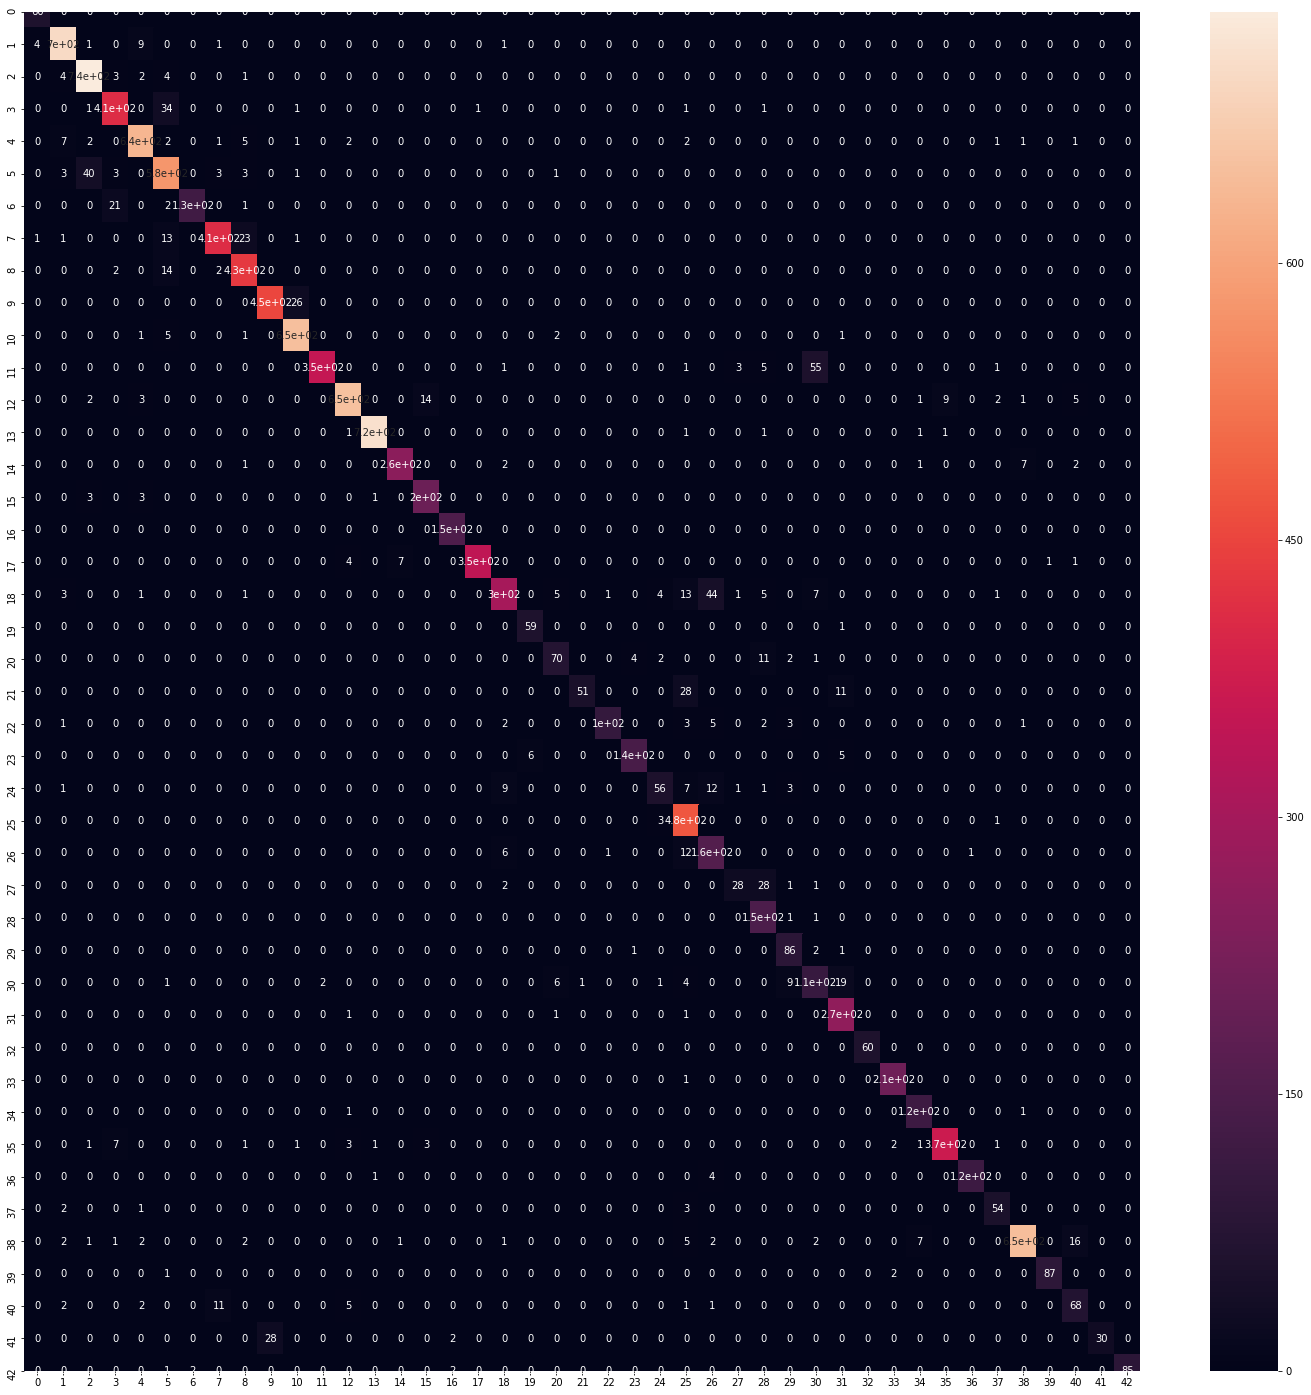

In [51]:
predicted_classes = model2.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

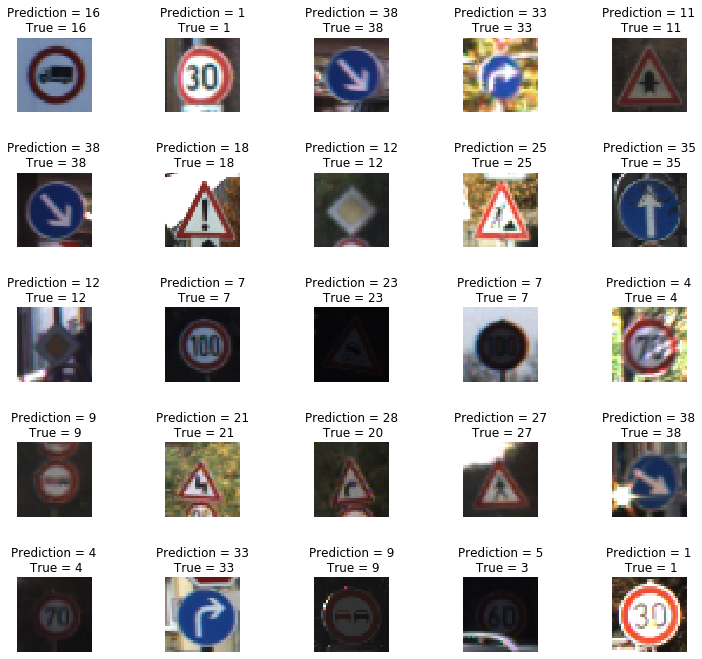

In [52]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [54]:
import pickle 
filename = 'trafficsign_model2.sav'
pickle.dump(model2, open(filename, 'wb'))

TypeError: can't pickle _thread.RLock objects

In [63]:
import joblib
joblib.dump(model, 'TSJ1.sav')

TypeError: can't pickle _thread.RLock objects

In [57]:


model2.save("TS1_h5",save_format='h5')

In [62]:

loaded_model_h5 = tf.keras.models.load_model('TS1_h5')


# Evaluate the loaded model after loading weights from h5 
loss, acc_h5 = loaded_model_h5.evaluate(X_test_gray_norm, y_test, verbose=1)
print("Loaded model (h5), accuracy: {:5.2f}%".format(100*acc_h5))

395/395 [==============================] - 1s 4ms/step - loss: 0.2543 - acc: 0.0051
Loaded model (h5), accuracy:  0.51%


In [65]:


model.save("TS1_h5",save_format='h5')

In [66]:

loaded_model_h5 = tf.keras.models.load_model('TS1_h5')


# Evaluate the loaded model after loading weights from h5 
loss, acc_h5 = loaded_model_h5.evaluate(X_test_gray_norm, y_test, verbose=1)
print("Loaded model (h5), accuracy: {:5.2f}%".format(100*acc_h5))

395/395 [==============================] - 2s 6ms/step - loss: 0.4183 - acc: 0.0045
Loaded model (h5), accuracy:  0.45%
